افراد را بر اساس نمره‌ی T اختلالات خواب به دو دسته تقسیم کنید: دسته‌ی با نمره‌ی T زیر پنجاه را بدون اختلال خواب و دسته‌ی بالای ۵۰ را دارای اختلال خواب در نظر بگیرید؛ توزیع میانگین نور محیطی در طول روز را برای این دو دسته نمایش دهید.

In [1]:
import pyarrow.parquet as pa 
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_steps_lights = pd.read_csv('../data/all_data_steps_light.csv')
df_steps_lights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25763 entries, 0 to 25762
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25763 non-null  int64  
 1   day_number        25763 non-null  int64  
 2   weekday           25763 non-null  int64  
 3   daily_light_mean  25763 non-null  float64
 4   daily_steps       25763 non-null  float64
 5   quarter           25763 non-null  int64  
 6   user_id           25763 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ MB


In [3]:
df_daily_light_mean = pd.DataFrame(df_steps_lights
                                   .groupby(by=['user_id'], as_index=False)
                                   ['daily_light_mean'].mean())
df_daily_light_mean.head()

,user_id,daily_light_mean
0,00115b9f,16.674422
1,001f3379,14.952973
2,00f332d1,56.572300
3,01085eb3,19.046971
4,012cadd8,50.717254


In [5]:
df_hbn = pd.read_csv('../data/HBN.csv')
df_hbn_sds_T = df_hbn[['id', 'SDS-SDS_Total_T']].copy()

print(df_hbn_sds_T.info())
df_hbn_sds_T = df_hbn_sds_T.dropna()
print(df_hbn_sds_T.info())
print(df_hbn_sds_T.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3960 non-null   object 
 1   SDS-SDS_Total_T  2606 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2606 entries, 1 to 3958
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2606 non-null   object 
 1   SDS-SDS_Total_T  2606 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.1+ KB
None
         id  SDS-SDS_Total_T
1  000fd460             64.0
2  00105258             54.0
3  00115b9f             45.0
5  001f3379             56.0
6  0038ba98             40.0


In [6]:
df_hbn_sds_T['has_sleep_dis'] = (df_hbn_sds_T['SDS-SDS_Total_T'] > 50)
df_hbn_sds_T.head(10)

,id,SDS-SDS_Total_T,has_sleep_dis
1,000fd460,64.0,True
2,00105258,54.0,True
3,00115b9f,45.0,False
5,001f3379,56.0,True
6,0038ba98,40.0,False
11,00abe655,59.0,True
12,00ae59c9,47.0,False
15,00c0cd71,50.0,False
16,00d56d4b,53.0,True
18,00e6167c,55.0,True


In [7]:
df_hbn_sds_T = df_hbn_sds_T.rename(columns={'id':'user_id'})
df_hbn_sds_T.head()

,user_id,SDS-SDS_Total_T,has_sleep_dis
1,000fd460,64.0,True
2,00105258,54.0,True
3,00115b9f,45.0,False
5,001f3379,56.0,True
6,0038ba98,40.0,False


<Axes: >

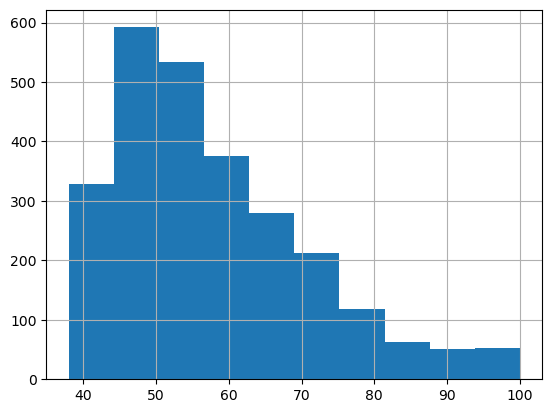

In [8]:
df_hbn_sds_T['SDS-SDS_Total_T'].hist()

In [9]:
df_light_sleep_dis = pd.merge(df_daily_light_mean, df_hbn_sds_T, on='user_id')
print(df_light_sleep_dis.info())
print(df_light_sleep_dis.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           896 non-null    object 
 1   daily_light_mean  896 non-null    float64
 2   SDS-SDS_Total_T   896 non-null    float64
 3   has_sleep_dis     896 non-null    bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 22.0+ KB
None
    user_id  daily_light_mean  SDS-SDS_Total_T  has_sleep_dis
0  00115b9f         16.674422             45.0          False
1  001f3379         14.952973             56.0           True
2  00f332d1         56.572300             43.0          False
3  01085eb3         19.046971             73.0           True
4  012cadd8         50.717254             40.0          False
5  029a19c9         26.695723             46.0          False
6  02cebf33         36.233222            100.0           True
7  02cf7384         14.985192             51.0     

In [10]:
df_light_sleep_dis['Sleep'] = df_light_sleep_dis['has_sleep_dis'].map({True: 'Bad!', False: 'Good!'})
df_light_sleep_dis.head()

,user_id,daily_light_mean,SDS-SDS_Total_T,has_sleep_dis,Sleep
0,00115b9f,16.674422,45.0,False,Good!
1,001f3379,14.952973,56.0,True,Bad!
2,00f332d1,56.572300,43.0,False,Good!
3,01085eb3,19.046971,73.0,True,Bad!
4,012cadd8,50.717254,40.0,False,Good!


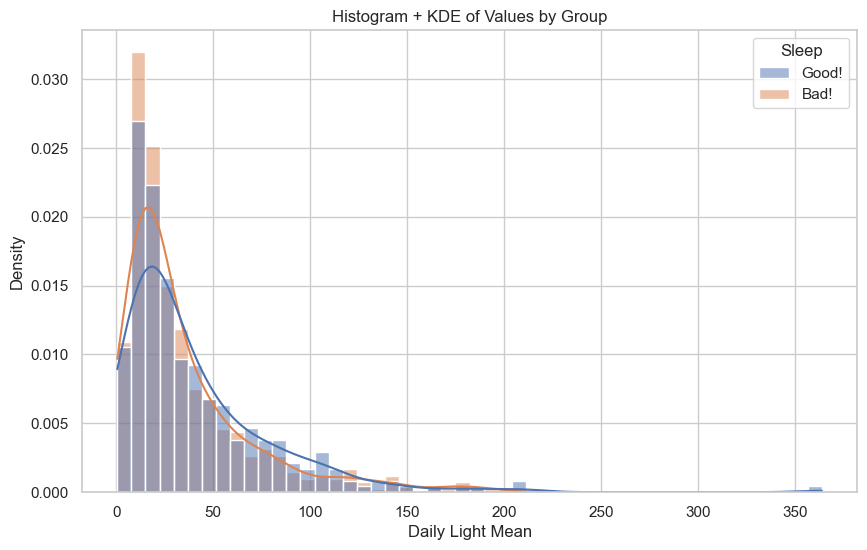

In [11]:

# ---------------------------------------------------------------------
# 2. Compare distributions using different plot types
# ---------------------------------------------------------------------
sns.set(style="whitegrid")  # a nice background style for clarity

# ----------------- (a) Histogram + KDE Overlay ------------------------
plt.figure(figsize=(10, 6))
sns.histplot(data=df_light_sleep_dis, x='daily_light_mean', hue='Sleep', kde=True, multiple='layer', stat='density', common_norm=False)
plt.title('Histogram + KDE of Values by Group')
plt.xlabel('Daily Light Mean')
plt.ylabel('Density')
# plt.legend(title='Sleep')
plt.show()


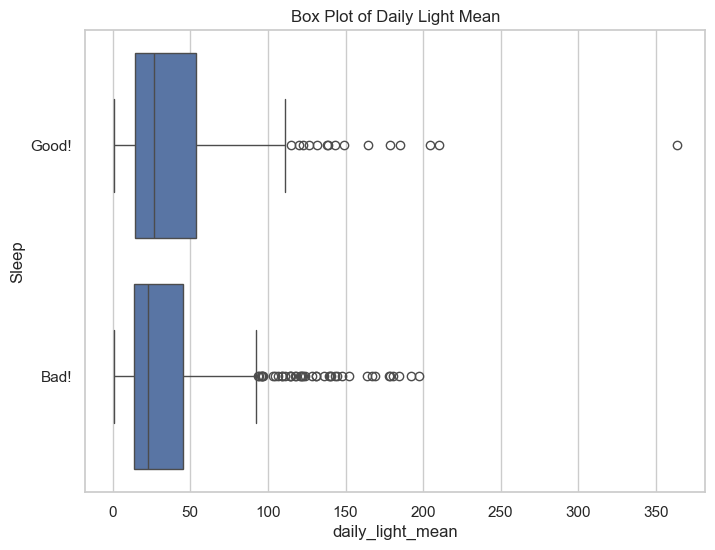

In [12]:


# Note: 
# - stat='density' normalizes the histogram counts so that the total area equals 1.
# - common_norm=False ensures each group's distribution is normalized independently.

# ----------------- (b) Box Plot ------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_light_sleep_dis, x='daily_light_mean', y='Sleep')
plt.title('Box Plot of Daily Light Mean')
plt.xlabel('daily_light_mean')
plt.ylabel('Sleep')
plt.show()


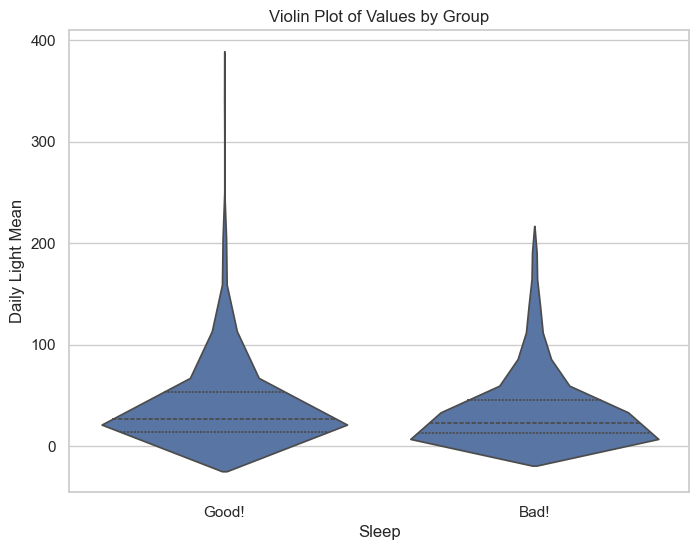

In [13]:


# ----------------- (c) Violin Plot ----------------------
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_light_sleep_dis, x='Sleep', y='daily_light_mean', inner='quartile', gridsize=10)
plt.title('Violin Plot of Values by Group')
plt.xlabel('Sleep')
plt.ylabel('Daily Light Mean')
plt.show()


/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_16270/2263661609.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_light_sleep_dis[df_light_sleep_dis['Sleep'] == 'Good!']['daily_light_mean'], shade=True, label='Good Sleep')
/var/folders/ff/4p_yj_510c95r3qx09wm60bh0000gn/T/ipykernel_16270/2263661609.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_light_sleep_dis[df_light_sleep_dis['Sleep'] == 'Bad!']['daily_light_mean'], shade=True, label='Bad Sleep')


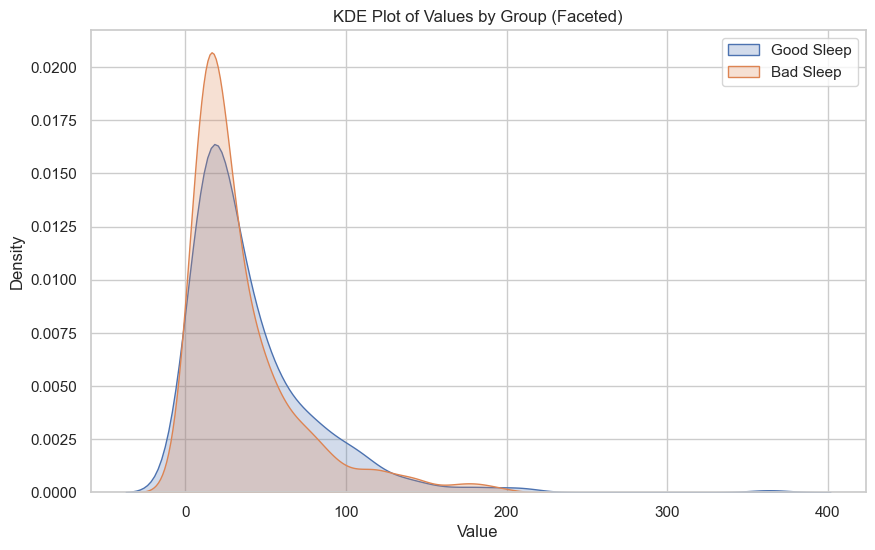

In [14]:


# ----------------- (d) KDE Plot (separate facets) --------------------
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_light_sleep_dis[df_light_sleep_dis['Sleep'] == 'Good!']['daily_light_mean'], shade=True, label='Good Sleep')
sns.kdeplot(data=df_light_sleep_dis[df_light_sleep_dis['Sleep'] == 'Bad!']['daily_light_mean'], shade=True, label='Bad Sleep')

plt.title('KDE Plot of Values by Group (Faceted)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [15]:
df_light_sleep_dis['log_light_mean']  = np.log1p(df_light_sleep_dis['daily_light_mean'])
df_light_sleep_dis.head()

,user_id,daily_light_mean,SDS-SDS_Total_T,has_sleep_dis,Sleep,log_light_mean
0,00115b9f,16.674422,45.0,False,Good!,2.872119
1,001f3379,14.952973,56.0,True,Bad!,2.769645
2,00f332d1,56.572300,43.0,False,Good!,4.053042
3,01085eb3,19.046971,73.0,True,Bad!,2.998078
4,012cadd8,50.717254,40.0,False,Good!,3.945791


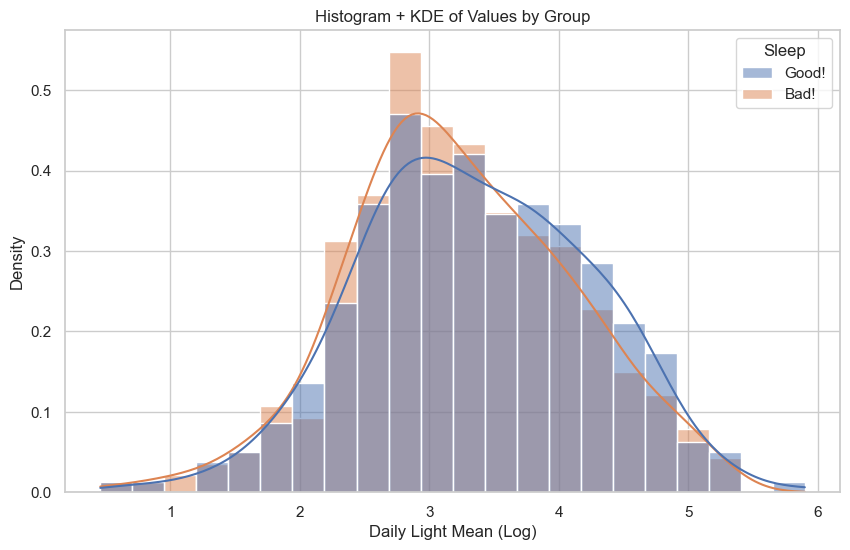

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_light_sleep_dis, x='log_light_mean', hue='Sleep', kde=True, multiple='layer', stat='density', common_norm=False)
plt.title('Histogram + KDE of Values by Group')
plt.xlabel('Daily Light Mean (Log)')
plt.ylabel('Density')
# plt.legend(title='Sleep')
plt.show()